In [4]:
## 🧰 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [8]:
df = pd.read_csv("C:/Users/HP/Downloads/Crime_Statistics_September_2025.csv")

In [9]:
print("\n--- Dataset Overview ---")


--- Dataset Overview ---


In [10]:
print(df.head())

  Names of Unit  Dacoity  Robbery  Murder  Speedy Trial  Riot  \
0           DMP        4       36      25            11     1   
1           CMP        0        4       7             4     0   
2           KMP        0        2       0             0     0   
3           RMP        0        3       0             0     0   
4           BMP        1        0       0             0     0   

   Woman & Child Repression  Kidnapping  Police Assault  Burglary  Theft  \
0                       137          19               4        44    119   
1                        46           2               5        12     41   
2                        16           2               1         6     15   
3                        13           4               0         5      8   
4                        34           1               1         5      9   

   Other Cases  Arms Act  Explosive Act  Narcotics  Smuggling  Total Recovery  \
0          576        16              9        522          6          

In [11]:
print(df.describe())

         Dacoity    Robbery     Murder  Speedy Trial       Riot  \
count  17.000000  17.000000  17.000000     17.000000  17.000000   
mean    3.058824  10.764706  17.294118      6.705882   0.352941   
std     4.422536  14.532418  20.918786      7.422640   0.785905   
min     0.000000   0.000000   0.000000      0.000000   0.000000   
25%     0.000000   2.000000   2.000000      3.000000   0.000000   
50%     1.000000   4.000000  15.000000      5.000000   0.000000   
75%     4.000000  12.000000  24.000000      8.000000   0.000000   
max    16.000000  51.000000  77.000000     31.000000   3.000000   

       Woman & Child Repression  Kidnapping  Police Assault   Burglary  \
count                 17.000000   17.000000       17.000000  17.000000   
mean                 107.529412    4.411765        2.470588  21.235294   
std                  109.494930    6.413451        3.299955  20.595902   
min                    0.000000    0.000000        0.000000   0.000000   
25%                   13.0

C:\Users\HP\AppData\Local\Temp\ipykernel_4480\1445855378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Names of Unit', y='Total Cases', palette='viridis')


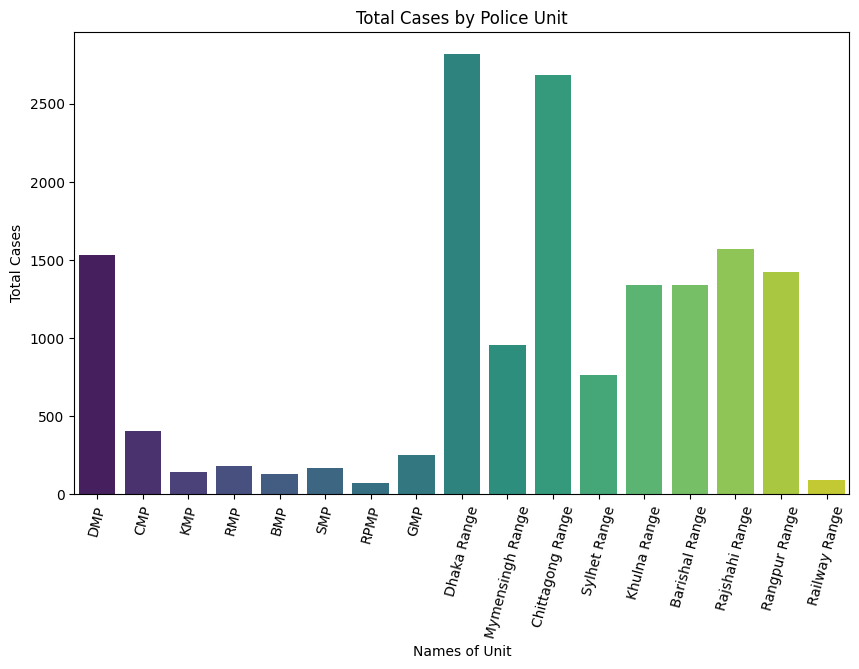

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Names of Unit', y='Total Cases', palette='viridis')
plt.xticks(rotation=75)
plt.title('Total Cases by Police Unit')
plt.show()

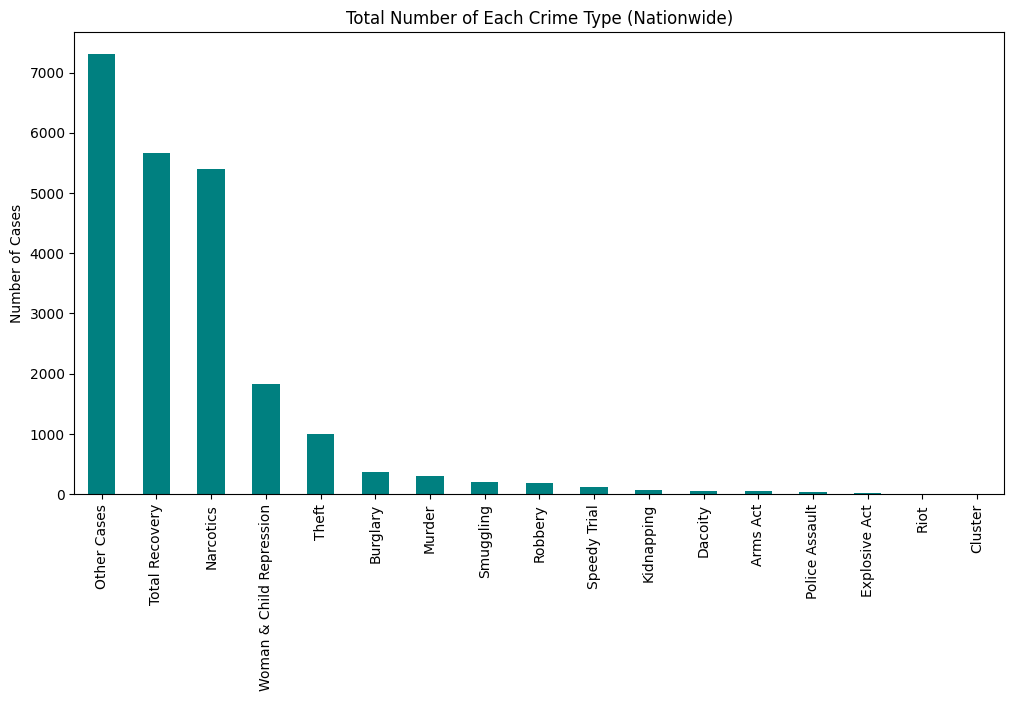

In [23]:
crime_types = df.drop(['Names of Unit', 'Total Cases'], axis=1).sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
crime_types.plot(kind='bar', color='teal')
plt.title('Total Number of Each Crime Type (Nationwide)')
plt.ylabel('Number of Cases')
plt.show()

In [33]:
max_murder = df.loc[df['Murder'].idxmax(), ['Names of Unit', 'Murder']]
print("Highest murder count:")
print(max_murder)

Highest murder count:
Names of Unit    Dhaka Range
Murder                    77
Name: 8, dtype: object


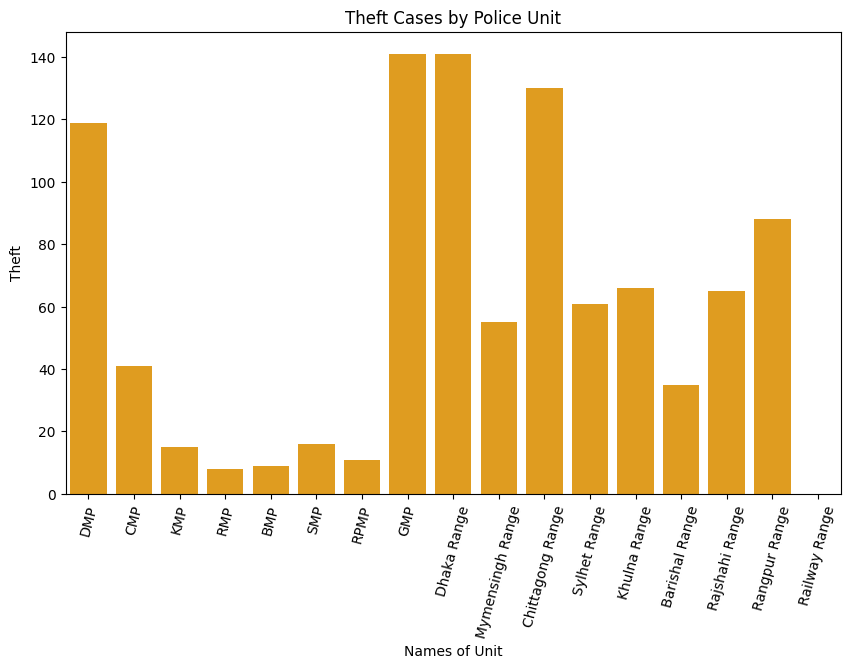

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Names of Unit', y='Theft', color='orange')
plt.xticks(rotation=75)
plt.title('Theft Cases by Police Unit')
plt.show()

In [25]:
print("Average total cases across all units:", df['Total Cases'].mean())

Average total cases across all units: 931.2352941176471


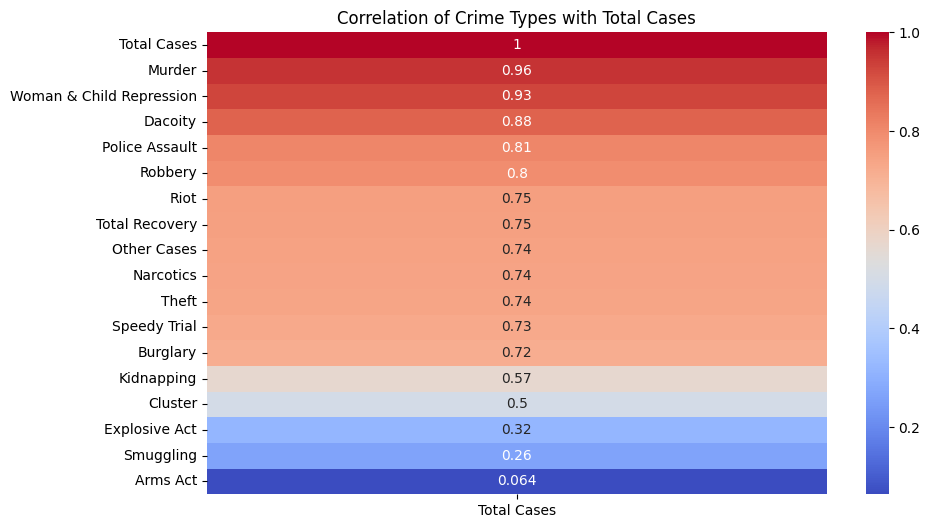

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True)[['Total Cases']].sort_values(by='Total Cases', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Crime Types with Total Cases')
plt.show()

In [27]:
dhaka_chittagong = df[df['Names of Unit'].isin(['Dhaka Range', 'Chittagong Range'])]['Total Cases'].sum()
percent = (dhaka_chittagong / df['Total Cases'].sum()) * 100
print(f"Dhaka + Chittagong Ranges account for {percent:.2f}% of total cases.")

Dhaka + Chittagong Ranges account for 34.73% of total cases.


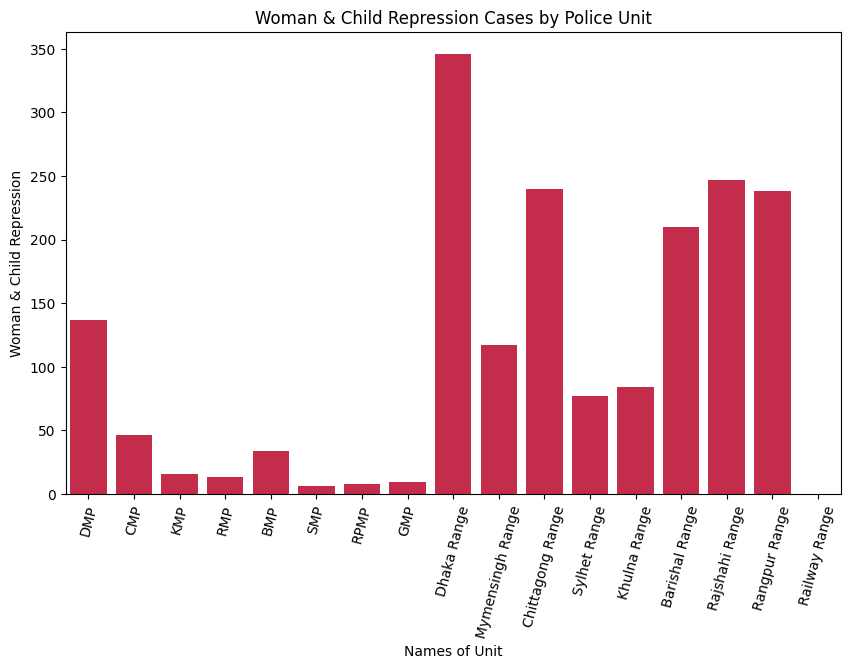

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Names of Unit', y='Woman & Child Repression', color='crimson')
plt.xticks(rotation=75)
plt.title('Woman & Child Repression Cases by Police Unit')
plt.show()

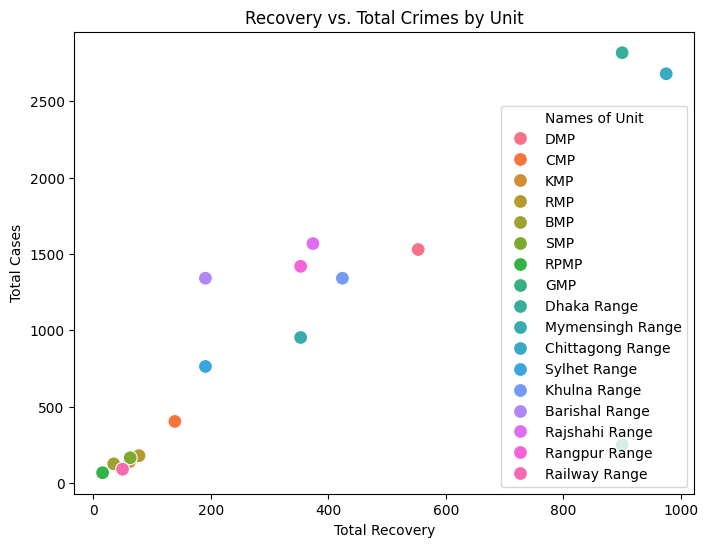

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Total Recovery', y='Total Cases', hue='Names of Unit', s=100)
plt.title('Recovery vs. Total Crimes by Unit')
plt.show()

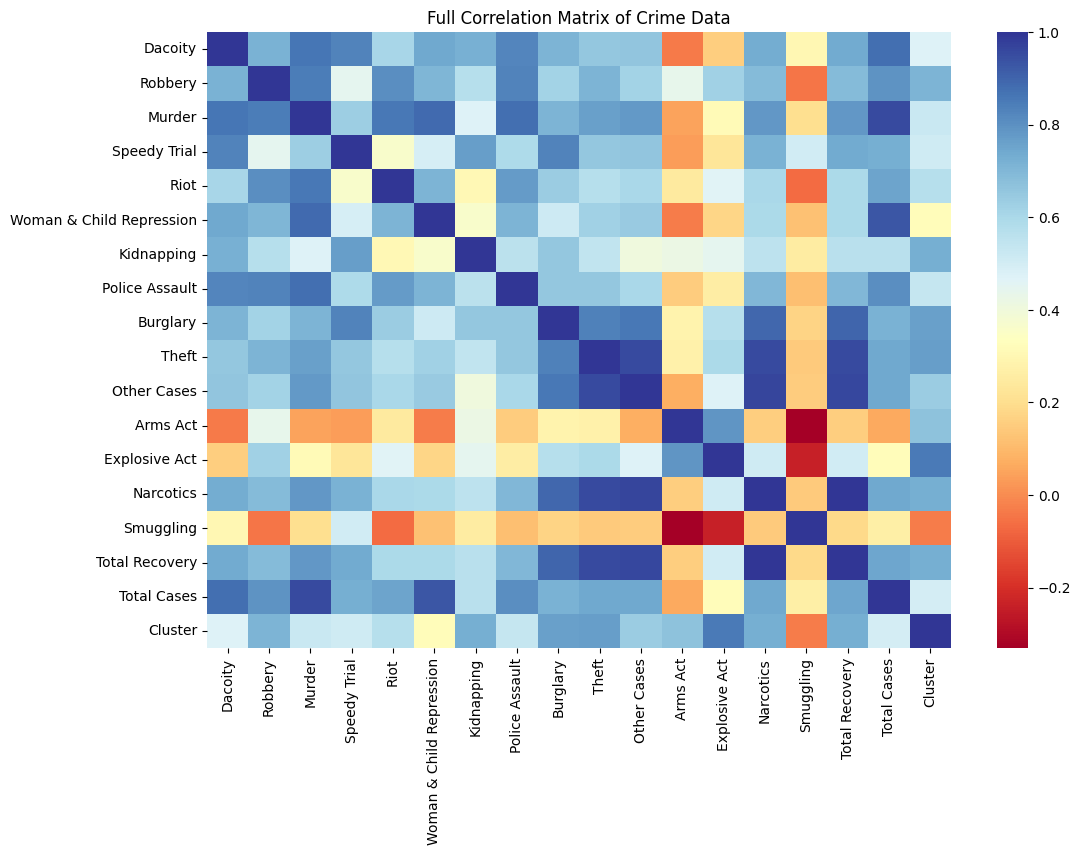

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='RdYlBu', annot=False)
plt.title('Full Correlation Matrix of Crime Data')
plt.show()

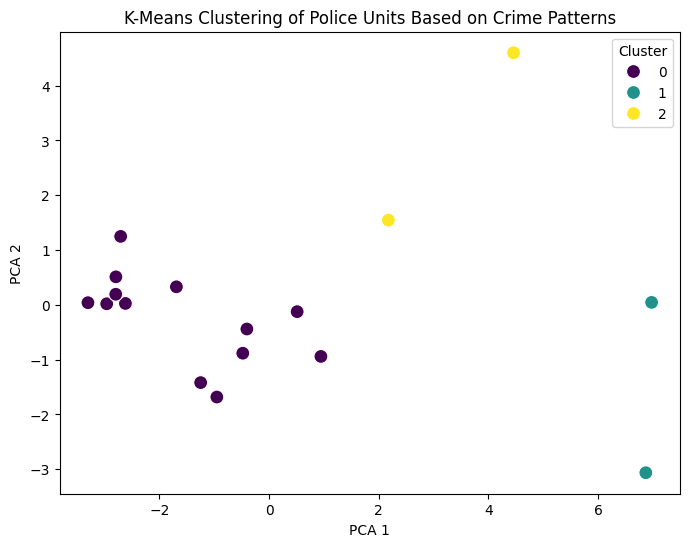

In [31]:
### 🔹 11️⃣ Clustering Police Units Based on Crime Patterns
features = df.select_dtypes(include=np.number).drop(columns=['Total Cases'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)


plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering of Police Units Based on Crime Patterns')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

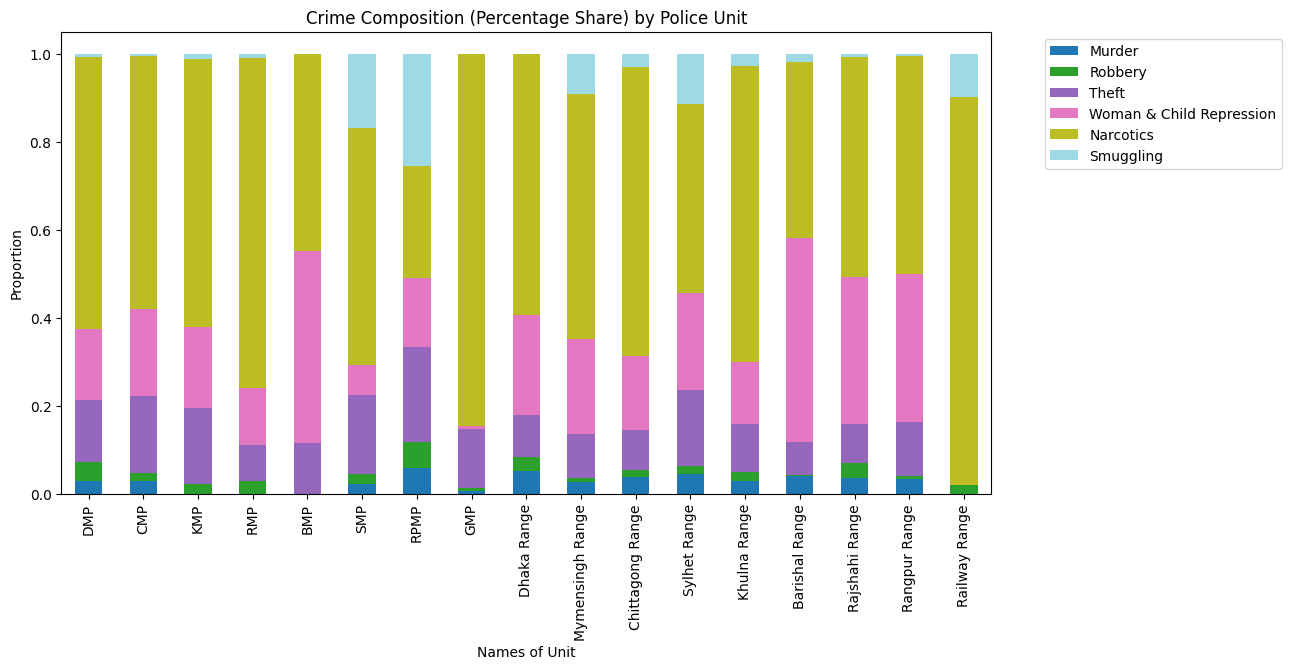

In [32]:
crime_cols = ['Murder','Robbery','Theft','Woman & Child Repression','Narcotics','Smuggling']
crime_share = df[['Names of Unit'] + crime_cols].set_index('Names of Unit')
crime_share = crime_share.div(crime_share.sum(axis=1), axis=0)


crime_share.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Crime Composition (Percentage Share) by Police Unit')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()